### import

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

In [4]:
# 시각화 함수
def visualize(df, min_date='2020-01-01', max_date=None):

    # Step 1: Identify the relevant columns
    date_columns = ['LON_DE', 'RESVE_DE', 'RTURN_DE', 'REGIST_DE']
    present_columns = [col for col in date_columns if col in df.columns]

    if not present_columns:
        print("No relevant columns found in the dataset.")
        return

    for col in present_columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

    min_date = pd.to_datetime(min_date)
    max_date = pd.to_datetime(max_date) if max_date else None

    for col in present_columns:
        if df[col].notna().sum() > 0:
            filtered_data = df[col].dropna()
            filtered_data = filtered_data[filtered_data >= min_date]
            if max_date:
                filtered_data = filtered_data[filtered_data <= max_date]

            weekly_data = filtered_data.dt.to_period('W').value_counts().sort_index()

            plt.figure(figsize=(10, 6))
            weekly_data.index = weekly_data.index.to_timestamp()
            plt.plot(weekly_data.index, weekly_data.values, marker='o', linestyle='-')
            plt.title(f'Weekly Trend for {col}')
            plt.xlabel('Week')
            plt.ylabel('Count')
            plt.grid(True)
            plt.show()
        else:
            print(f"Column {col} contains no valid date data.")

# 특정 이름의 책에 대한 대출, 반납률 산출 함수
def find_book(name, book_data, loan_data):
    no_list = list(book_data[book_data['TITLE_NM'] == name]['CTRL_NO'])
    loan_list = []

    for no in tqdm(no_list):
        temp = loan_data[loan_data['BOOK_KEY_NO'] == no].copy()
        loan_list.append(temp)

    result_df = pd.concat(loan_list, ignore_index=True)

    result_df = result_df.sort_values(by='LON_DE')
    result_df['ARRIVAL_DIFF'] = result_df['LON_DE'].diff().dt.days
    result_df['SERVICE_DIFF'] = (result_df['RTURN_DE'] - result_df['LON_DE']).dt.days
    result_df['MISSING'] = result_df['RTURN_DE'].isna().astype(int)
    result_df['ARRIVAL_TIME'] = result_df['ARRIVAL_DIFF'].mean()
    result_df['SERVICE_TIME'] = result_df['SERVICE_DIFF'].mean()
    result_df['MISSING_RATE'] = result_df['MISSING'].mean()

    required_columns = [
        "SEQ_NO", "BOOK_KEY_NO", "LON_DE", "RTURN_DE",
        "LBRRY_CD", "RESVE_DE", "RESVE_END_DE",
        "ARRIVAL_DIFF", "SERVICE_DIFF", "MISSING",
        "ARRIVAL_TIME", "SERVICE_TIME", "MISSING_RATE"
    ]

    result_df = result_df[required_columns]

    return result_df

# 분포 확인 함수
def gen_dist(data):
    plt.figure(figsize=(14, 6))

    # ARRIVAL_DIFF 히스토그램
    plt.subplot(1, 2, 1)
    plt.hist(data['ARRIVAL_DIFF'].dropna(), bins=20, edgecolor='black')
    plt.title('Arrival Time Differences')
    plt.xlabel('Days')
    plt.ylabel('Frequency')

    # SERVICE_DIFF 히스토그램
    plt.subplot(1, 2, 2)
    plt.hist(data['SERVICE_DIFF'].dropna(), bins=20, edgecolor='black')
    plt.title('Service Times')
    plt.xlabel('Days')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


### 전체데이터

<ipython-input-6-f04055f1412b>:10: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_3 = pd.read_csv('loan_data_23to24.csv')


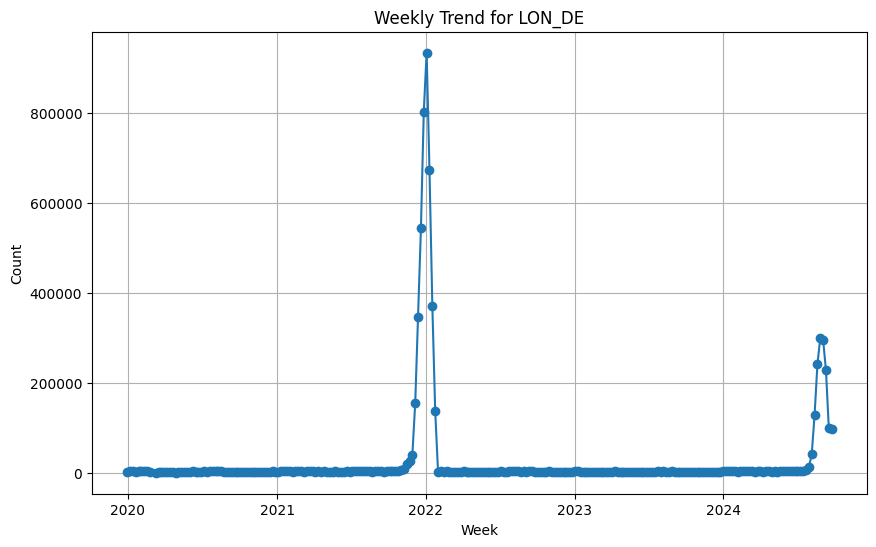

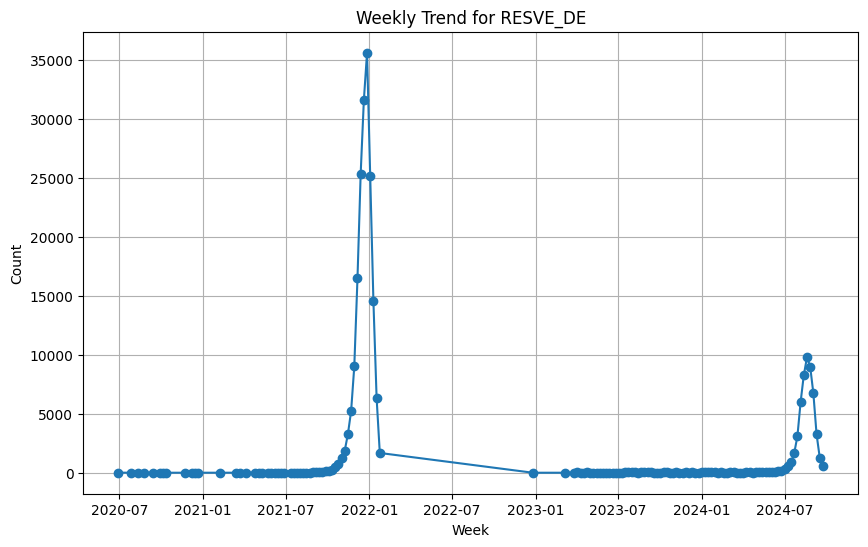

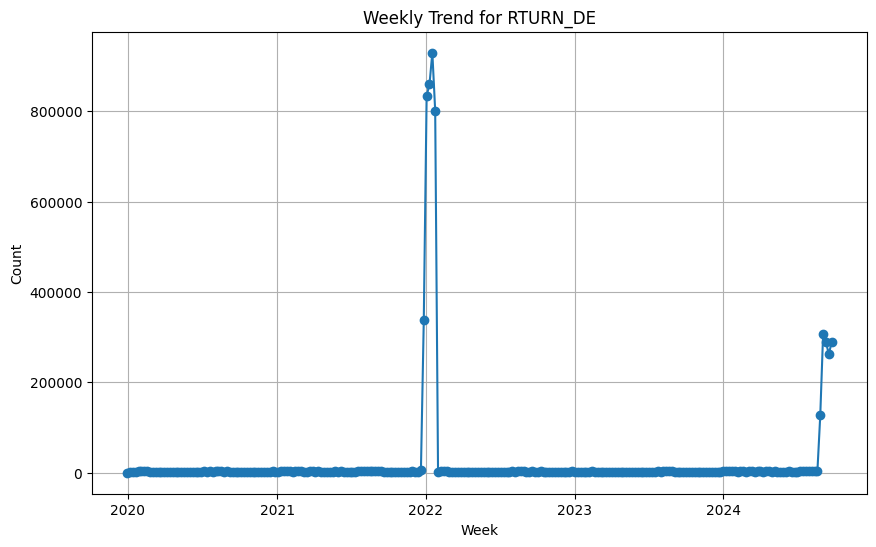

In [6]:
# 데이터 병합
os.chdir('/content/drive/MyDrive/File_Korea.Univ/2024 2학기/시뮬레이션 및 실습(백준걸 교수님)/Team Project')

bd_1 = pd.read_csv('book_data.csv')
bd_2 = pd.read_csv('book_data23_24.csv')
bd = pd.concat([bd_1, bd_2], ignore_index=True)

df_1 = pd.read_csv('loan_data.csv')
df_2 = pd.read_csv('loan_data_2.csv')
df_3 = pd.read_csv('loan_data_23to24.csv')
df_total = pd.concat([df_1, df_2, df_3], ignore_index=True)
visualize(df_total)

### 2024 06 이후 데이터 조작

<ipython-input-13-f7e41a96a445>:3: DtypeWarning: Columns (6,7,10,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('NL_CO_LOAN_PUB_202406-1.csv')
<ipython-input-13-f7e41a96a445>:4: DtypeWarning: Columns (1,6,7,9,10,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('NL_CO_LOAN_PUB_202406-2.csv')
<ipython-input-13-f7e41a96a445>:5: DtypeWarning: Columns (6,7,10,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('NL_CO_LOAN_PUB_202406-3.csv')
<ipython-input-13-f7e41a96a445>:6: DtypeWarning: Columns (6,7,9,10,11,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('NL_CO_LOAN_PUB_202406-4.csv')
<ipython-input-13-f7e41a96a445>:7: DtypeWarning: Columns (6,7,10,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv('NL_CO_

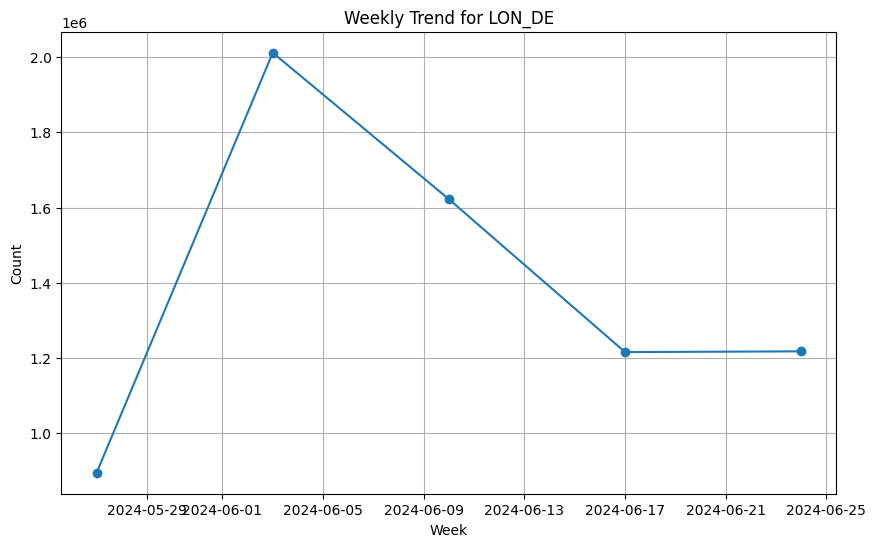

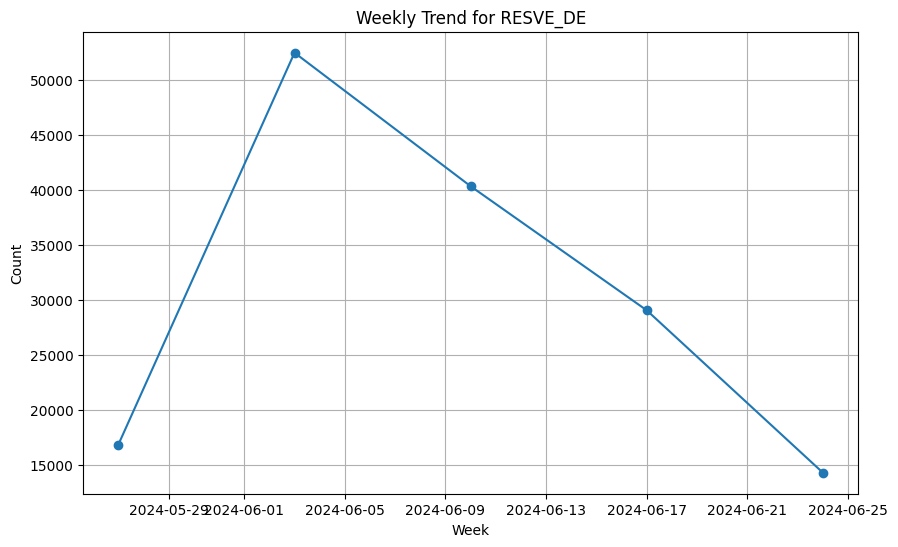

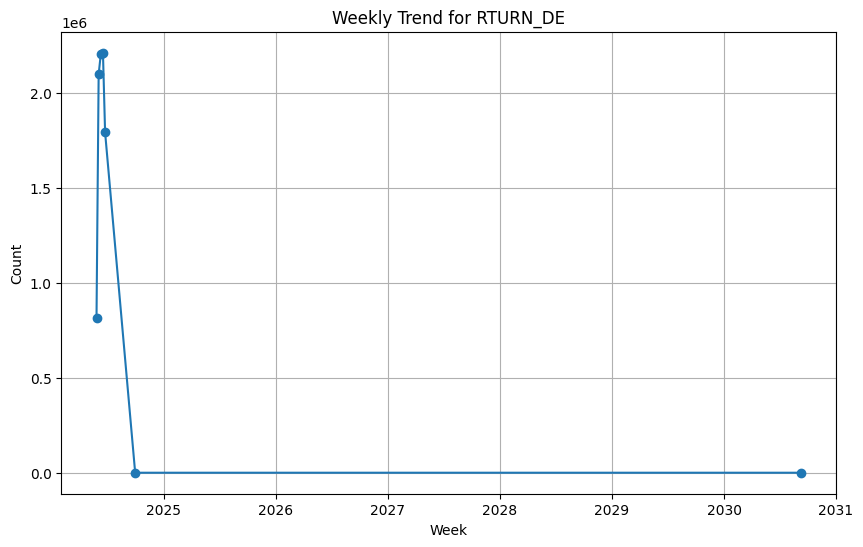

In [ ]:
os.chdir('/content/drive/MyDrive/File_Korea.Univ/2024 2학기/시뮬레이션 및 실습(백준걸 교수님)/Team Project/24년6월이후데이터')

df1 = pd.read_csv('NL_CO_LOAN_PUB_202406-1.csv')
df2 = pd.read_csv('NL_CO_LOAN_PUB_202406-2.csv')
df3 = pd.read_csv('NL_CO_LOAN_PUB_202406-3.csv')
df4 = pd.read_csv('NL_CO_LOAN_PUB_202406-4.csv')
df5 = pd.read_csv('NL_CO_LOAN_PUB_202406-5.csv')
df6 = pd.read_csv('NL_CO_LOAN_PUB_202406-6.csv')

df_6 = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

visualize(df_6, '2024-06-01')

<ipython-input-14-66ba9846657f>:1: DtypeWarning: Columns (6,7,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('NL_CO_LOAN_PUB_202407-1.csv')
<ipython-input-14-66ba9846657f>:2: DtypeWarning: Columns (1,6,7,9,10,11,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('NL_CO_LOAN_PUB_202407-2.csv')
<ipython-input-14-66ba9846657f>:3: DtypeWarning: Columns (6,7,8,9,10,11,12,13,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('NL_CO_LOAN_PUB_202407-3.csv')
<ipython-input-14-66ba9846657f>:4: DtypeWarning: Columns (6,7,9,10,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('NL_CO_LOAN_PUB_202407-4.csv')
<ipython-input-14-66ba9846657f>:5: DtypeWarning: Columns (6,7,9,10,11,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv('NL_

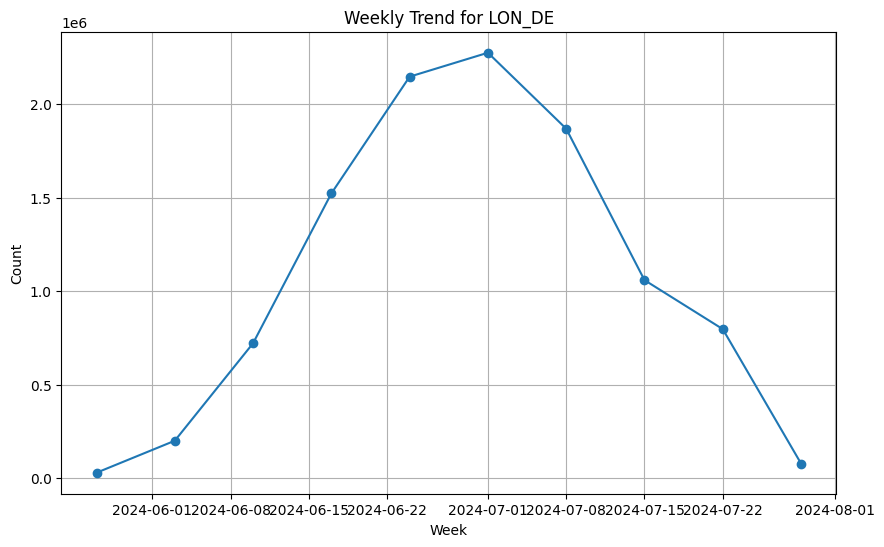

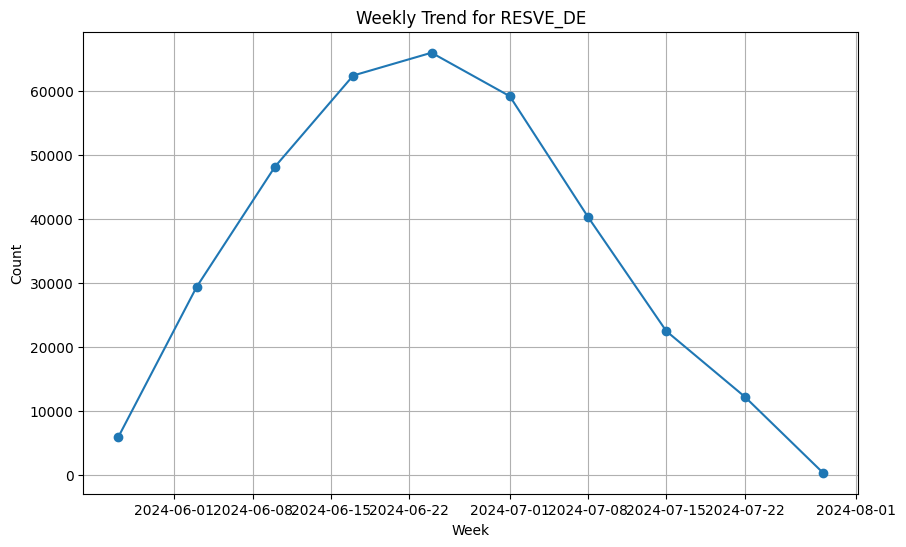

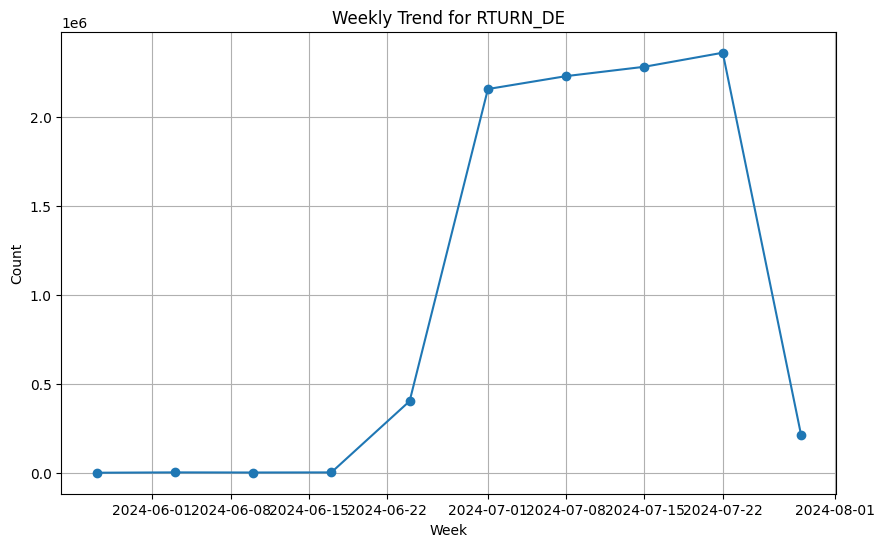

In [ ]:
df1 = pd.read_csv('NL_CO_LOAN_PUB_202407-1.csv')
df2 = pd.read_csv('NL_CO_LOAN_PUB_202407-2.csv')
df3 = pd.read_csv('NL_CO_LOAN_PUB_202407-3.csv')
df4 = pd.read_csv('NL_CO_LOAN_PUB_202407-4.csv')
df5 = pd.read_csv('NL_CO_LOAN_PUB_202407-5.csv')
df6 = pd.read_csv('NL_CO_LOAN_PUB_202407-6.csv')
df7 = pd.read_csv('NL_CO_LOAN_PUB_202407-7.csv')

df_7 = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=True)

visualize(df_7, '2024-06-01')

<ipython-input-16-d3096cf02bbd>:1: DtypeWarning: Columns (6,7,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('NL_CO_LOAN_PUB_202408-1.csv')
<ipython-input-16-d3096cf02bbd>:2: DtypeWarning: Columns (1,6,7,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('NL_CO_LOAN_PUB_202408-2.csv')
<ipython-input-16-d3096cf02bbd>:3: DtypeWarning: Columns (8,9,10,12,13,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('NL_CO_LOAN_PUB_202408-3.csv')
<ipython-input-16-d3096cf02bbd>:4: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('NL_CO_LOAN_PUB_202408-4.csv')
<ipython-input-16-d3096cf02bbd>:5: DtypeWarning: Columns (6,7,10,11,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv('NL_CO_LOAN_PUB_202408-5.csv

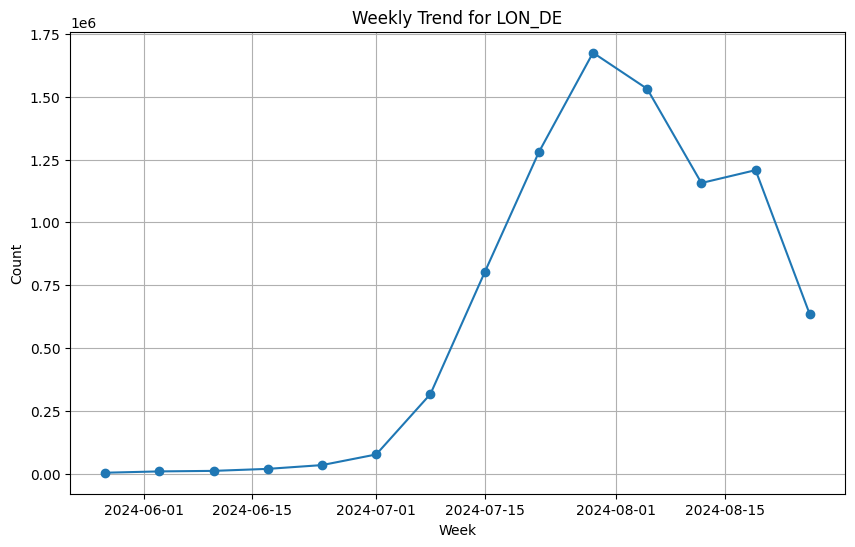

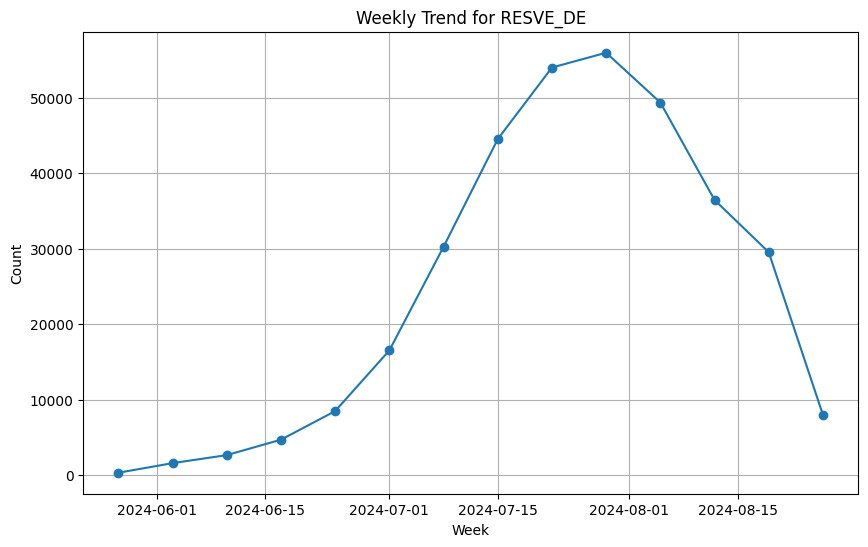

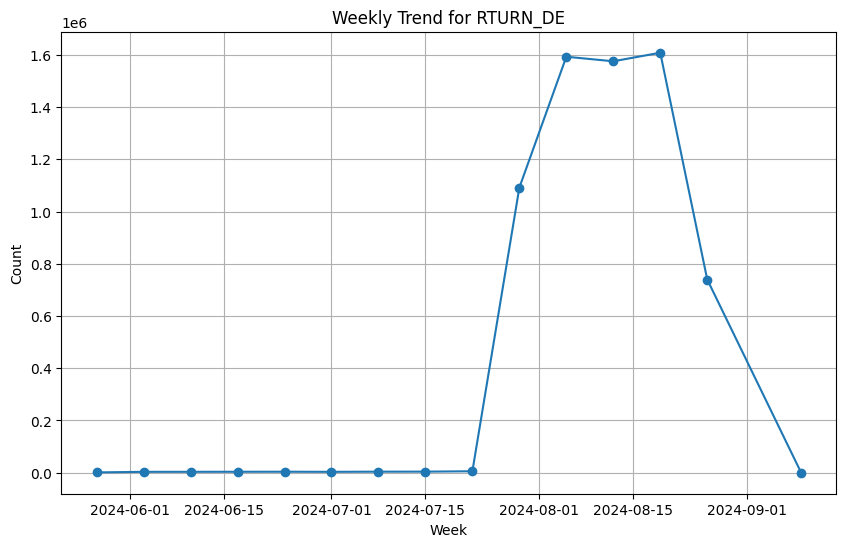

In [ ]:
df1 = pd.read_csv('NL_CO_LOAN_PUB_202408-1.csv')
df2 = pd.read_csv('NL_CO_LOAN_PUB_202408-2.csv')
df3 = pd.read_csv('NL_CO_LOAN_PUB_202408-3.csv')
df4 = pd.read_csv('NL_CO_LOAN_PUB_202408-4.csv')
df5 = pd.read_csv('NL_CO_LOAN_PUB_202408-5.csv')
df6 = pd.read_csv('NL_CO_LOAN_PUB_202408-6.csv')
df7 = pd.read_csv('NL_CO_LOAN_PUB_202408-7.csv')

df_8 = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=True)

visualize(df_8, '2024-06-01')

<ipython-input-17-66aad38546a4>:1: DtypeWarning: Columns (6,7,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('NL_CO_LOAN_PUB_202409-1.csv')
<ipython-input-17-66aad38546a4>:2: DtypeWarning: Columns (1,6,7,10,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('NL_CO_LOAN_PUB_202409-2.csv')
<ipython-input-17-66aad38546a4>:3: DtypeWarning: Columns (6,7,9,10,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('NL_CO_LOAN_PUB_202409-3.csv')
<ipython-input-17-66aad38546a4>:4: DtypeWarning: Columns (6,7,9,10,11,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('NL_CO_LOAN_PUB_202409-4.csv')
<ipython-input-17-66aad38546a4>:5: DtypeWarning: Columns (8,9,10,11,12,13,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv('NL_CO_LOAN_P

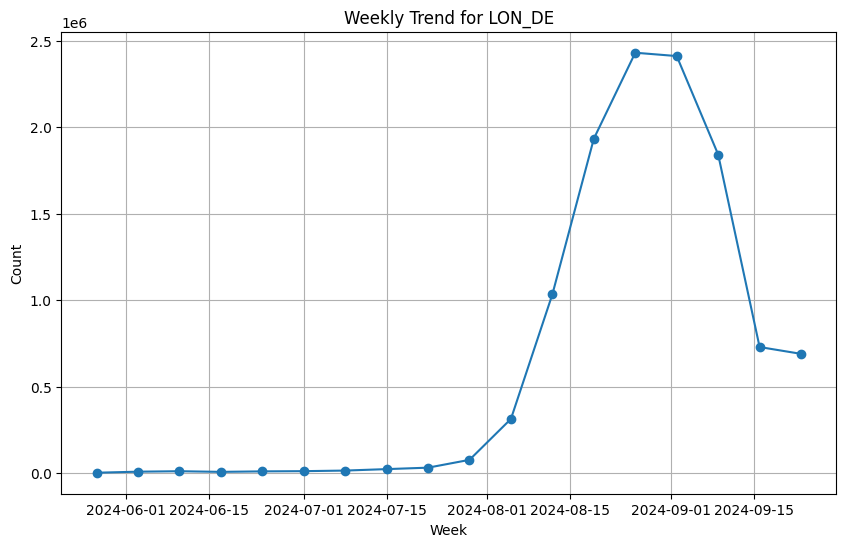

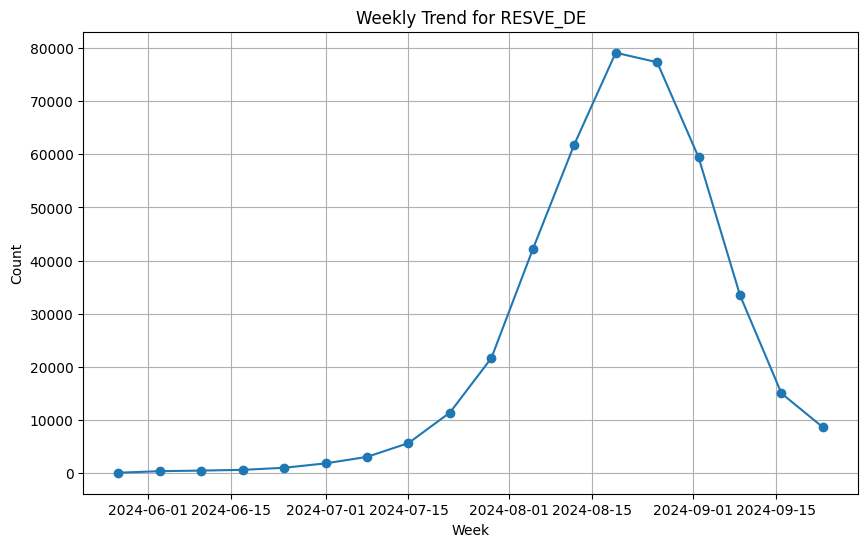

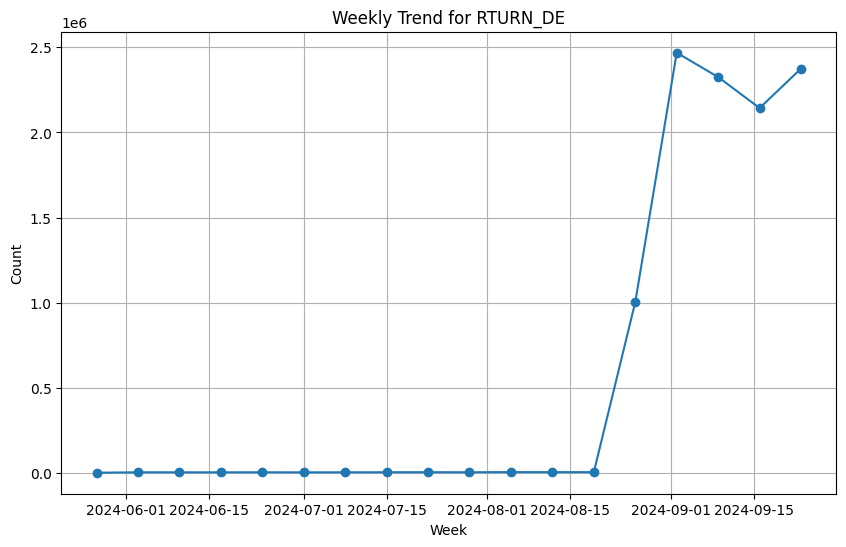

In [ ]:
df1 = pd.read_csv('NL_CO_LOAN_PUB_202409-1.csv')
df2 = pd.read_csv('NL_CO_LOAN_PUB_202409-2.csv')
df3 = pd.read_csv('NL_CO_LOAN_PUB_202409-3.csv')
df4 = pd.read_csv('NL_CO_LOAN_PUB_202409-4.csv')
df5 = pd.read_csv('NL_CO_LOAN_PUB_202409-5.csv')
df6 = pd.read_csv('NL_CO_LOAN_PUB_202409-6.csv')
df7 = pd.read_csv('NL_CO_LOAN_PUB_202409-7.csv')
df8 = pd.read_csv('NL_CO_LOAN_PUB_202409-8.csv')

df_9 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], ignore_index=True)

visualize(df_9, '2024-06-01')

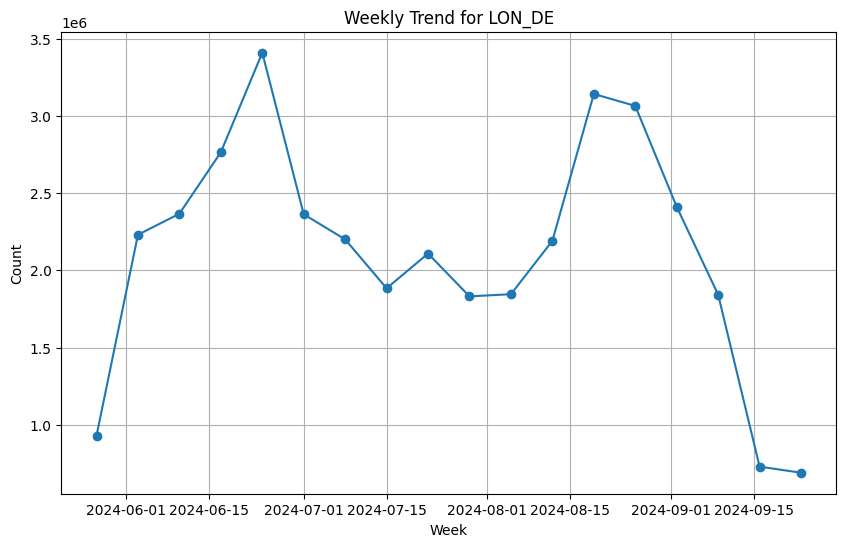

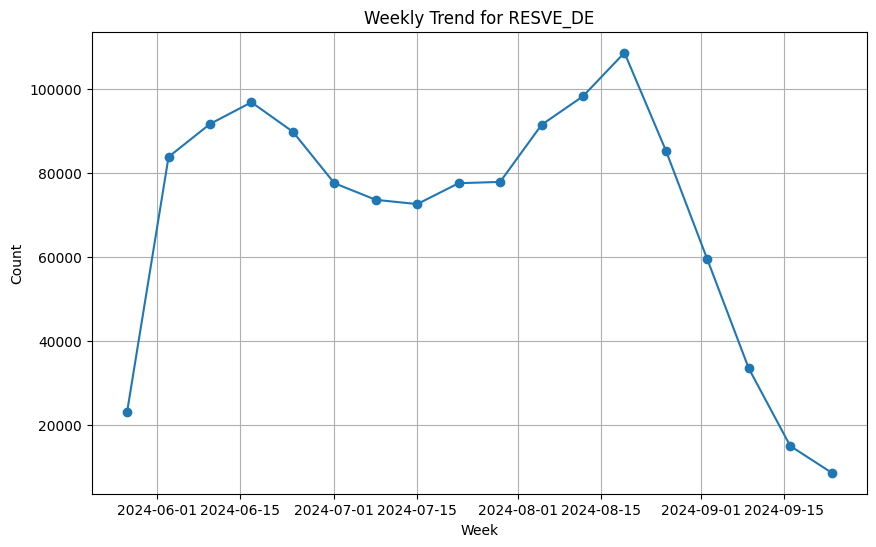

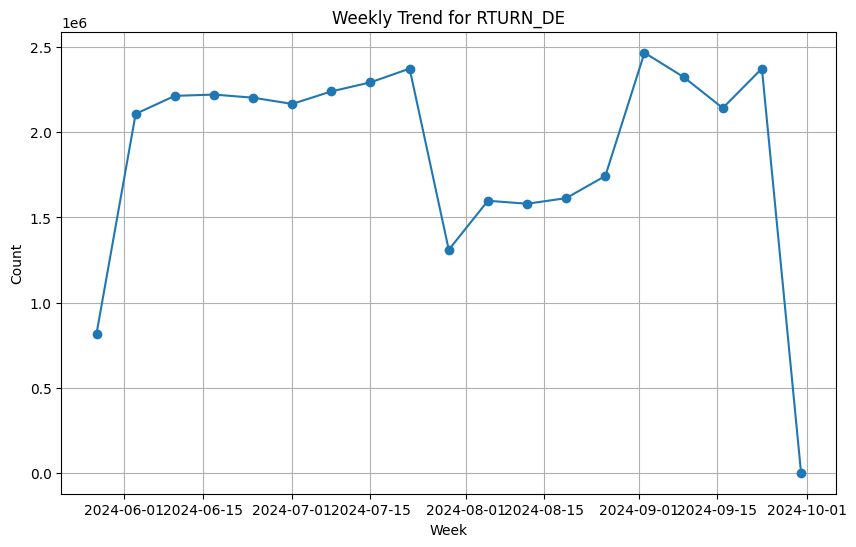

In [ ]:
df = pd.concat([df_6, df_7, df_8, df_9], ignore_index=True)
visualize(df, '2024-06-01', '2024-10-01')
df.to_csv('loan.csv', index=False)

In [ ]:
df

,SEQ_NO,BOOK_KEY_NO,MBER_SEQ_NO_VALUE,LON_DE,RTURN_DE,LBRRY_CD,LON_STLE_NM,RTURN_STLE_NM,RTURN_PREARNGE_DE,RESVE_DE,RESVE_END_DE,LON_STATE_NM,LON_PLACE_NM,RTURN_PLACE_NM,MANAGE_LBRRY_CD,LON_LBRRY_CD,RTURN_LBRRY_CD,MASTR_LBRRY_CD
0,96745157,96238312,dd1bc79e0940239f922e6ce62e537373be1ec23f5fe96e...,2024-05-23 12:00:00,2024-05-31 12:00:00,4529,0,0.0,2024-06-07 12:00:00.0,NaT,NaN,1,KOLASIII,KOLASIII,MD,MD,MD,4500
1,96745159,96238256,dd1bc79e0940239f922e6ce62e537373be1ec23f5fe96e...,2024-05-23 12:00:00,2024-05-31 12:00:00,4529,0,0.0,2024-06-07 12:00:00.0,NaT,NaN,1,KOLASIII,KOLASIII,MD,MD,MD,4500
2,96745161,96238241,dd1bc79e0940239f922e6ce62e537373be1ec23f5fe96e...,2024-05-23 12:00:00,2024-05-31 12:00:00,4529,0,0.0,2024-06-07 12:00:00.0,NaT,NaN,1,KOLASIII,KOLASIII,MD,MD,MD,4500
3,96745178,96238244,dd1bc79e0940239f922e6ce62e537373be1ec23f5fe96e...,2024-05-23 12:00:00,2024-05-31 12:00:00,4529,0,0.0,2024-06-07 12:00:00.0,NaT,NaN,1,KOLASIII,KOLASIII,MD,MD,MD,4500
4,96745259,69273807,2a993b30e452b038d24aa627e8487fabe3c1fa97622a07...,2024-05-23 12:00:00,2024-06-16 12:00:00,4529,3,0.0,2024-06-14 12:00:00.0,NaT,NaN,1,SMARTID,KOLASIII,MD,MD,MD,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53247507,74210347,73172477,e1d1b892e36029bb5e00e1fe514d75c2bf9300dbf13a15...,2024-09-29 00:00:00,NaT,33800,3,NaN,2024-10-13,NaT,NaN,2,KOLASIII,NaN,MA,NaN,NaN,33800
53247508,74210348,73608302,e1d1b892e36029bb5e00e1fe514d75c2bf9300dbf13a15...,2024-09-29 00:00:00,NaT,33800,3,NaN,2024-10-13,NaT,NaN,2,KOLASIII,NaN,MA,NaN,NaN,33800
53247509,74210349,72361764,e1d1b892e36029bb5e00e1fe514d75c2bf9300dbf13a15...,2024-09-29 00:00:00,NaT,33800,3,NaN,2024-10-13,NaT,NaN,2,KOLASIII,NaN,MA,NaN,NaN,33800
53247510,74210350,73057919,e1d1b892e36029bb5e00e1fe514d75c2bf9300dbf13a15...,2024-09-29 00:00:00,NaT,33800,3,NaN,2024-10-13,NaT,NaN,2,KOLASIII,NaN,MA,NaN,NaN,33800


In [ ]:
book1 = find_book('바깥은 여름', bd, df)
book1.head()

100%|██████████| 16/16 [01:01<00:00,  3.83s/it]


,SEQ_NO,BOOK_KEY_NO,LON_DE,RTURN_DE,LBRRY_CD,RESVE_DE,RESVE_END_DE,ARRIVAL_DIFF,SERVICE_DIFF,MISSING,ARRIVAL_TIME,SERVICE_TIME,MISSING_RATE
0,436632271,112537499,2024-06-11 12:00:00,NaT,102,NaT,NaN,NaN,NaN,1,21.333333,13.388889,0.25
1,437720363,112537499,2024-07-25 00:00:00,2024-07-28,110,NaT,NaN,43.0,3.0,0,21.333333,13.388889,0.25
2,437821940,112537499,2024-08-01 00:00:00,NaT,101,NaT,NaN,7.0,NaN,1,21.333333,13.388889,0.25
3,438243681,112537499,2024-08-18 00:00:00,NaT,109,NaT,NaN,17.0,NaN,1,21.333333,13.388889,0.25
4,438511788,112537499,2024-09-05 00:00:00,2024-09-23,101,2024-09-03,2024-09-07,18.0,18.0,0,21.333333,13.388889,0.25


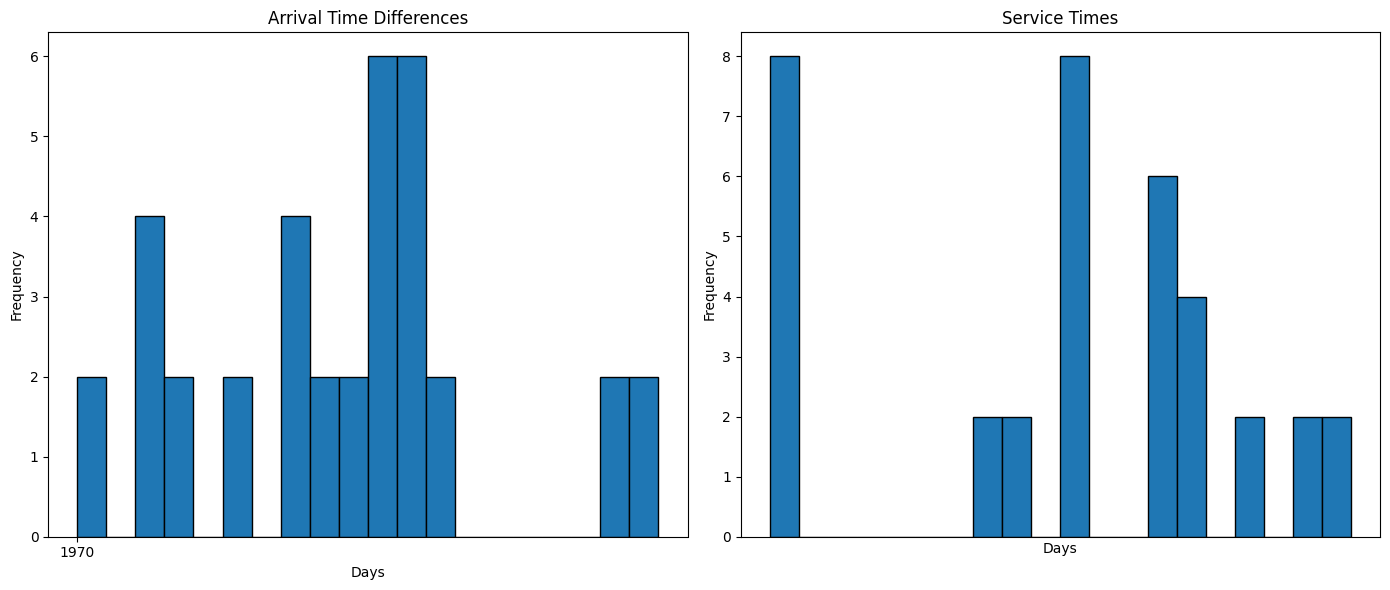

In [ ]:
gen_dist(book1)

100%|██████████| 188/188 [12:36<00:00,  4.02s/it]


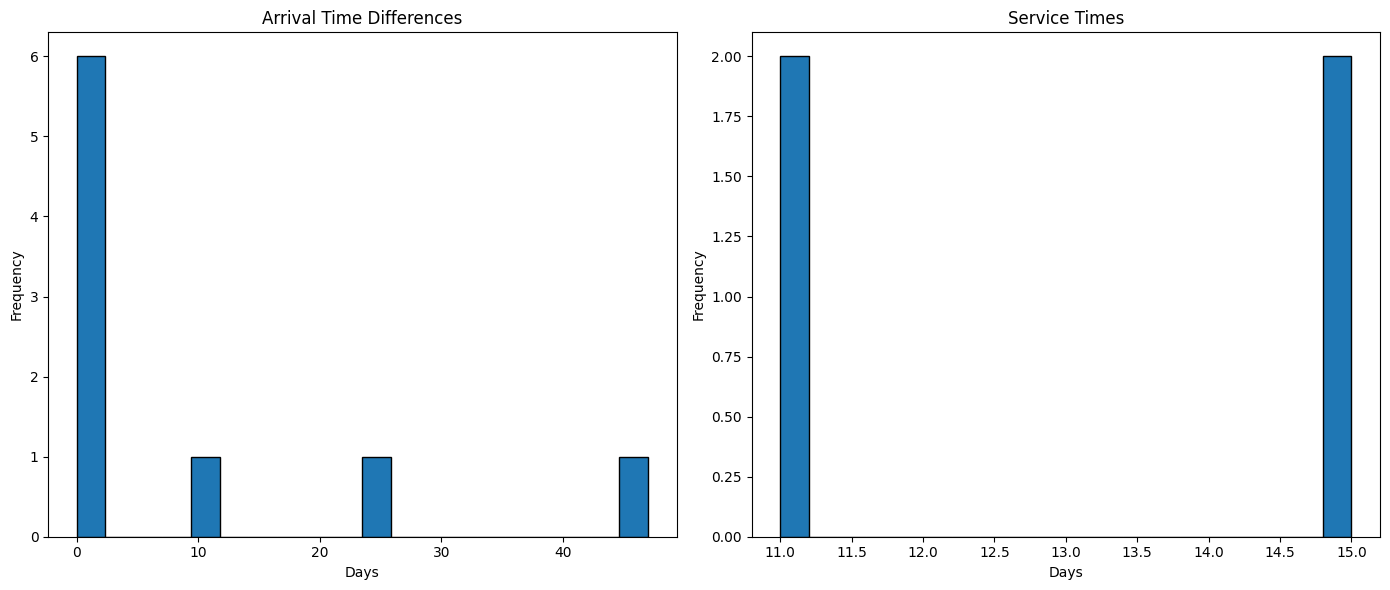

In [ ]:
book2 = find_book('여행의 이유', bd, df)
gen_dist(book2)

100%|██████████| 26/26 [01:42<00:00,  3.93s/it]


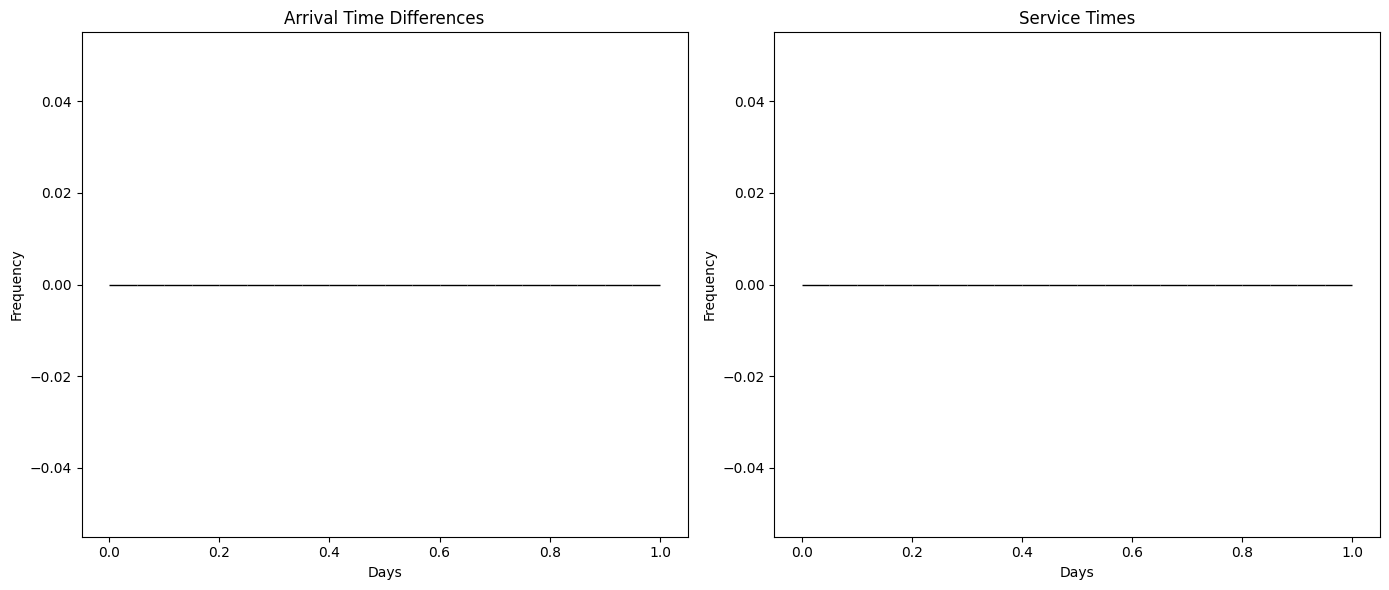

In [ ]:
book3 = find_book('파친코', bd, df)
gen_dist(book3)

In [ ]:
book2

,SEQ_NO,BOOK_KEY_NO,LON_DE,RTURN_DE,LBRRY_CD,RESVE_DE,RESVE_END_DE,ARRIVAL_DIFF,SERVICE_DIFF,MISSING,ARRIVAL_TIME,SERVICE_TIME,MISSING_RATE
0,436950463,403141090,2024-06-30,NaT,104,NaT,NaN,NaN,NaN,1,31.0,13.0,0.6
1,439021005,403141090,2024-09-20,NaT,104,NaT,NaN,82.0,NaN,1,31.0,13.0,0.6
2,403236060,403234862,2024-08-16,2024-08-27,10100,2024-08-14,2024-08-17,NaN,11.0,0,31.0,13.0,0.6
3,403260085,403234862,2024-08-27,NaT,10100,NaT,NaN,11.0,NaN,1,31.0,13.0,0.6
4,403260085,403234862,2024-08-27,2024-09-11,10100,NaT,NaN,0.0,15.0,0,31.0,13.0,0.6
5,436950463,403141090,2024-06-30,NaT,104,NaT,NaN,NaN,NaN,1,31.0,13.0,0.6
6,439021005,403141090,2024-09-20,NaT,104,NaT,NaN,82.0,NaN,1,31.0,13.0,0.6
7,403236060,403234862,2024-08-16,2024-08-27,10100,2024-08-14,2024-08-17,NaN,11.0,0,31.0,13.0,0.6
8,403260085,403234862,2024-08-27,NaT,10100,NaT,NaN,11.0,NaN,1,31.0,13.0,0.6
9,403260085,403234862,2024-08-27,2024-09-11,10100,NaT,NaN,0.0,15.0,0,31.0,13.0,0.6
